## Exercice 1.3 - Domains of attraction: illustration
### Statistical learning with extremes

_Mehdi-Lou Pigeard + Benjamin Lapostolle_

_________________

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Phenomenon of weak convergence stated in Fisher and Tipett’s theorem : case of uniform distribution

#### The uniform law belongs to the domain of attraction of Weibull
Let us focus on the uniform distribution on $[0, 1]$.
The cumulative density function is given by
$$
\begin{equation}
    F(x)=
    \begin{cases}
      0 & \text{if}\ x<0 \\
      x & \text{if}\ \in ~]0,1[ \\
      1 & \text{otherwise}
    \end{cases}
  \end{equation}\\
$$


Considering the norming sequences $a_n= \frac{1}{n}$ and $b_n = 1$, we have that for $x\leq 0$,
$$
F^n(a_nx+b)=(1+\frac{x}{n})^n=e^{n\log(1+\frac{x}{n})} \underset{n=+∞}{\sim} e^x=\Psi_{-1}(x)
$$
where $\Psi_{-1}(x)$ if the cumulative density function of the Weibull law of parameter $\alpha = -1$.

For $x\geq 0$,
$$
F^n(a_nx+b)=1=\Psi_{-1}(x)
$$

Hence, the considered uniform distribution belongs to the domain of attraction of Weibull.


#### Numerical visualization with block maxima

We are now going to generate $M$ blocks of size $n$ and look at the histogram of their maxima to numerically illustrate the result.

In [ ]:
# We generate M=1000 blocks of size n=200 of independent random variables
# distributed according to a uniform law on [0, 1]
M = 1000
n = 200

blocs = np.random.rand(M,n)
maxs = np.max(blocs, axis = 1)

##### Normalizing the maximum


In [ ]:
a = 1 / n
b = 1

maxs_N = (maxs - b) / a

##### Plots of the corresponding histograms


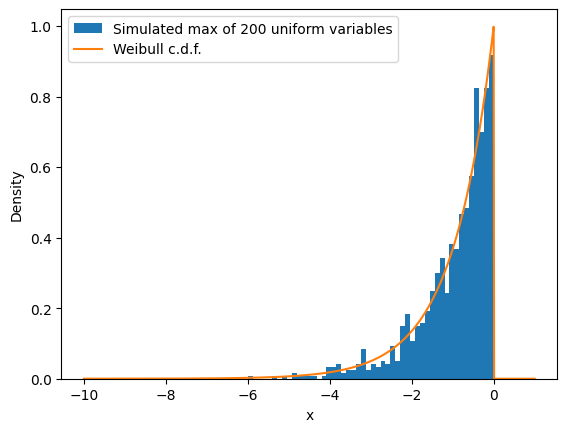

In [ ]:
fig, axs = plt.subplots()
plt.hist(maxs_N, bins = 50, density = True, label = f'Simulated max of {n} uniform variables')

x = np.linspace(-10,1,1000)
density = (x < 0) * np.exp(x)
plt.plot(x, density, label = 'Weibull c.d.f.')
plt.legend()
axs.set_xlabel('x')
axs.set_ylabel('Density')
plt.show()

#### Impact of the parameter $n$
In the following, we are going to let $M$ and $n$ vary so as to illustrate the weak convergence of maxima as $M → ∞$.
In th first plots below we fixed $M=500$ and let $n$ vary.

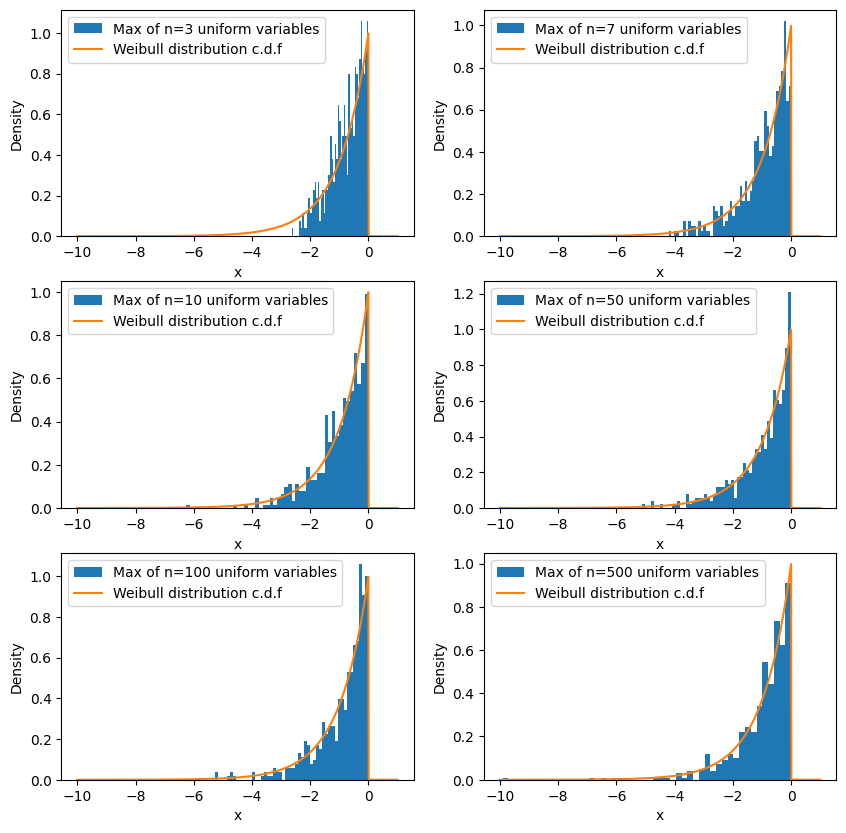

In [ ]:

fig, axs = plt.subplots(3,2, figsize = (10,10))

L_n = [3,7,10,50,100,500]
M = 500

x = np.linspace(-10,1,1000)
density = (x < 0) * np.exp(x)

for i in range(6):
  n = L_n[i]

  blocs = np.random.rand(M,n)
  maxs = np.max(blocs, axis = 1)

  a, b = 1 / n, 1
  maxs_N = (maxs - b) / a

  axs[i // 2, i % 2].hist(maxs_N, bins = 50, density = True, label = f'Max of n={n} uniform variables')
  axs[i // 2, i % 2].plot(x, density, label = 'Weibull distribution c.d.f')
  axs[i // 2, i % 2].legend()
  axs[i // 2, i % 2].set_xlabel('x')
  axs[i // 2, i % 2].set_ylabel('Density')
plt.show()

We observe that for a large enough value of $M$, the distribution of our maximum gets closer to the Weibull distribution when $n$ increases.

This is consistent with the maximum-domain of attraction condition (MDA) that states that the distribution of the maximum converges pointwise to the distribution of the Weibull as $n$ goes to $+∞$.

We further notice that even for low values of $n$ - around $10$ -, the distribution starts to look similar to the Weibull. This results is similar to what we observe for the Central Limit Theorem, which becomes empirically true even for low values of $n$.

#### Impact of the parameter $M$
We are now going to fix $n$ and let $M$ vary. We choose an appropriate value of $n = 500$ to be sure that the distribution of our normalized maximum follow relatively the Weibull distribution.

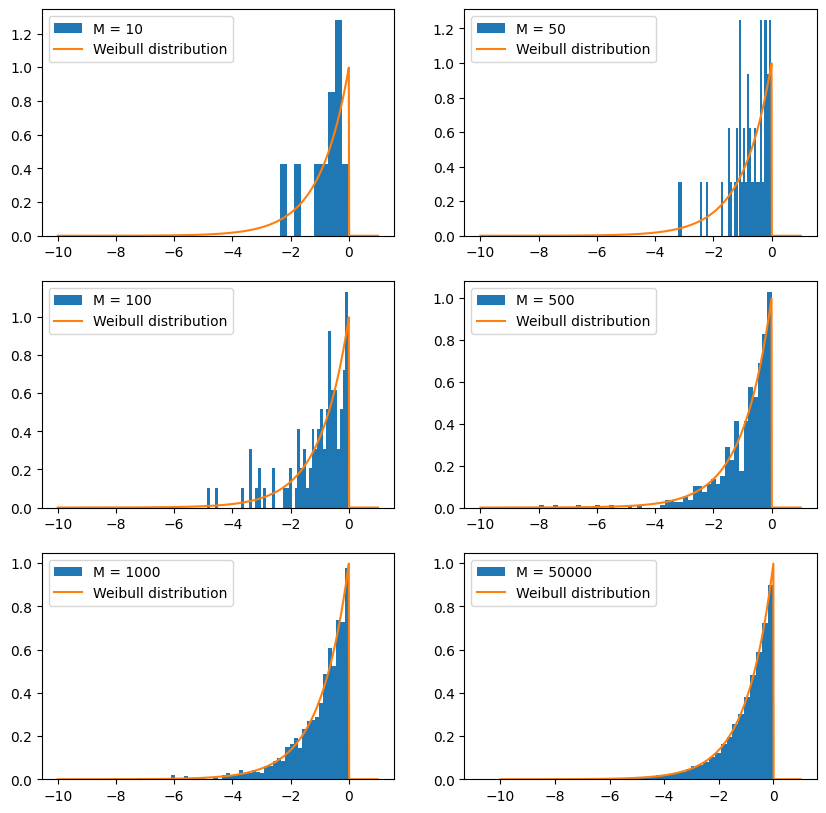

In [ ]:
fig, axs = plt.subplots(3,2, figsize = (10,10))

n = 500
L_M = [10, 50, 100, 500, 1000, 50000]

x = np.linspace(-10,1,1000)
density = (x < 0) * np.exp(x)

for i in range(6):
  M = L_M[i]

  blocs = np.random.rand(M,n)
  maxs = np.max(blocs, axis = 1)

  a, b = 1 / n, 1
  maxs_N = (maxs - b) / a

  axs[i // 2, i % 2].hist(maxs_N, bins = min(M, 50), density = True, label = f'M = {M}')
  axs[i // 2, i % 2].plot(x, density, label = 'Weibull distribution')
  axs[i // 2, i % 2].legend()

As $M$ increases we observe that our histogram gets closer to the Weibull density. Indeed, a larger $M$ improves the statistical efficiency of the estimator: more blocks provide more information and reduce the variability of the estimates. A larger $M$ also reduce the bias of our estimator.

The choice of the number of blocks is a compromise between statistical precision and computational feasibility but in our case, we don't reach computational limits.

### 2. Uniform convergence of c.d.f.

We are now interested in showing that the estimator of the maximum obtained using blocks maxima uniformly converges to the worresponding Weibull distribution. We start by plotting the empirical c.d.f. obtained by simulation.

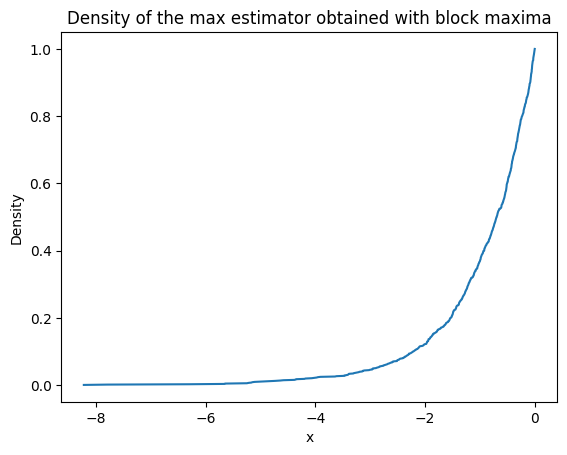

In [ ]:
# Blocks maxima simulation

M = 1000
n = 200

blocs = np.random.rand(M,n)
maxs = np.max(blocs, axis = 1)

# Normalization with a and b
a = 1 / n
b = 1

maxs_N = (maxs - b) / a

maxs_N_sorted = np.sort(maxs_N)
idxs = np.arange(1, M + 1) / M

fig, ax = plt.subplots()
ax.plot(maxs_N_sorted, idxs)
ax.set_xlabel('x')
ax.set_ylabel('Density')
ax.set_title('Density of the max estimator obtained with block maxima')
plt.show()

#### Visualization of the uniform convergence to the Weibull c.d.f. with $\alpha = -1$

We are now interested in increasing $s$ so as to numerically visualize the uniform converge of our empirical c.d.f. to the "true" Weibull distribution of parameter $\alpha = -1$.

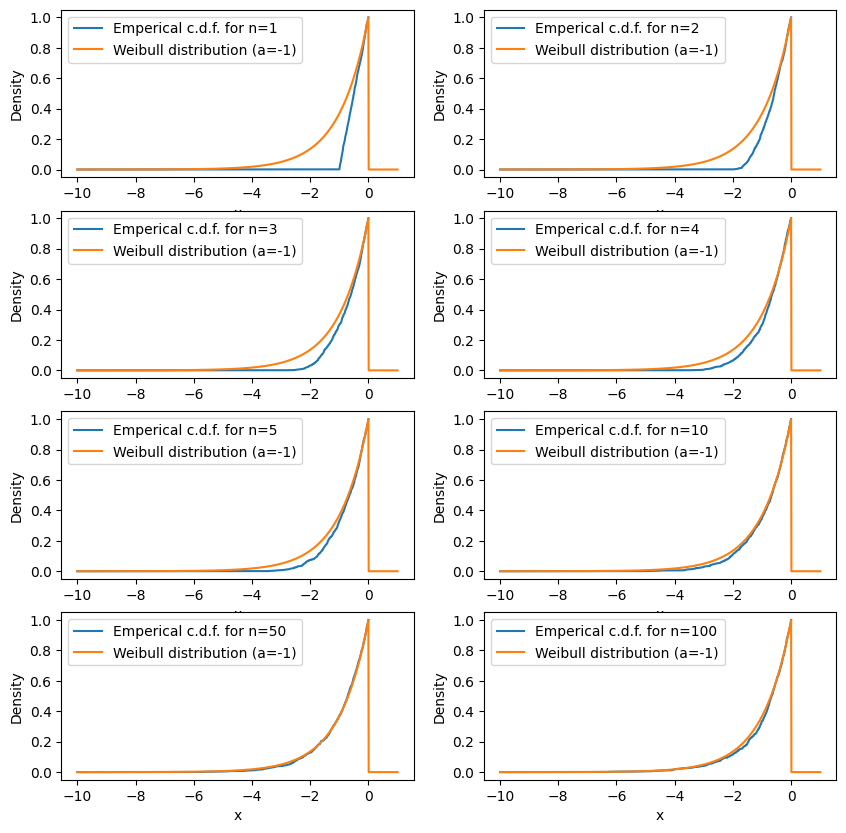

In [ ]:
fig, axs = plt.subplots(4,2, figsize = (10,10))

L_n = [1, 2, 3, 4, 5, 10, 50, 100]
M = 1000

x = np.linspace(-10,1,1000)
cdf = (x < 0) * np.exp(x)

for i in range(8):
  n = L_n[i]

  blocs = np.random.rand(M,n)
  maxs = np.max(blocs, axis = 1)

  a, b = 1 / n, 1
  maxs_N = (maxs - b) / a

  maxs_N_sorted = np.sort(maxs_N)
  maxs_N_sorted = np.insert(maxs_N_sorted, 0, -10) #we add a value of 0 to our emperical cdf at abscisse -10 to graphically show that our emperical distribution is equal to 0 for x < maxs_N_sorted[0]
  idxs = np.arange(0, M + 1) / M

  axs[i // 2, i % 2].plot(maxs_N_sorted, idxs, label = f'Emperical c.d.f. for n={n}')
  axs[i // 2, i % 2].plot(x, cdf, label = 'Weibull distribution (a=-1)')
  axs[i // 2, i % 2].legend()
  axs[i // 2, i % 2].set_xlabel('x')
  axs[i // 2, i % 2].set_ylabel('Density')

plt.show()

We can see in the above figure that we seem to have uniform convergence of the cdf of our maximum taken among $n$ uniform independant variables to the Weibull cdf as $n$ goes to $+∞$.

We now compute the $L^∞$ norm of the difference to visualize the uniform convergence to the Weibull cdf with $\alpha = -1$ when as $n$ increases.

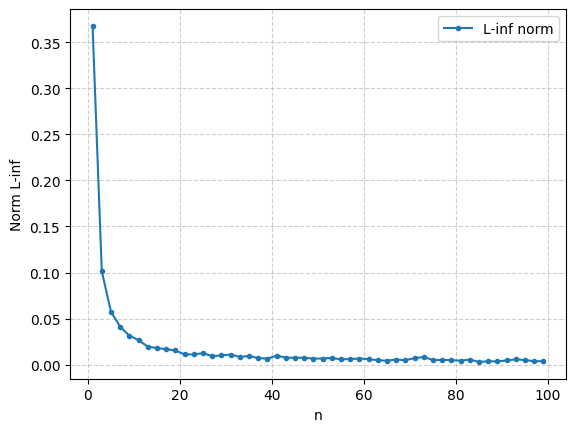

In [ ]:
L_n = np.arange(1, 100, 2)
sups = []
M = 100000

for n in L_n:

  blocs = np.random.rand(M,n)

  maxs = np.max(blocs, axis = 1)
  del blocs

  a, b = 1 / n, 1
  maxs_N = (maxs - b) / a

  maxs_N_sorted = np.sort(maxs_N)
  idxs = np.arange(1, M + 1) / M

  cdf = np.exp(maxs_N_sorted)
  sups.append(np.max(np.abs(idxs - cdf)))

plt.grid(True, linestyle = '--', alpha = 0.6)
plt.xlabel('n')
plt.plot(L_n, sups, marker = '.', label = 'L-inf norm')
plt.ylabel('Norm L-inf')
plt.legend()
plt.show()

We observe that the norm quickly goes to zero for $n\geq 10$.  It therefore seems like the cdf of our maximum taken among $n$ uniform independant variables to the Weibull cdf as $n$ goes to $+∞$.

####  **Theoretical proof : weak convergence of normalized maxima indeed implies uniform convergence of c.d.f’s**

We are now interested in showing that the weak convergence of normalized maxima implies the uniform convergence of the cdf to justify our observations.

We know that the Weibull cdf (noted $F$) is continuous on $\mathbb{R}$ and in particular on all segments $[a, b] \subset \mathbb{R}$  so that the lemma A.1.1 of the course gives that our estimated cdf (noted $F_n$) converge uniformly locally to the Weibull cdf, i.e.
$$
\forall a, b \in \mathbb{R}, \sup_{x \in [a, b]}|F_n(x)-F(x)| \underset{n→+∞}{⟶}0$$

As $F(x)\underset{x→-∞}{⟶}0$ and  $F(x)\underset{x→+∞}{⟶}1, \forall \epsilon > 0, ∃ ~ x_0 \in \mathbb{R}$ so that

$$
\begin{equation}
∀ x > x_0, |F(x)-1|<\epsilon \\
∀ x < -x_0, |F(x)|<\epsilon
\end{equation}
$$

We know that $\forall x \in \mathbb{R}, F_n(x)=F^n(a_nx+b_n)\in[0,1]$ as $F(y)\in [0,1]$. Hence, $(F_n)_n$ is a nonincreasing sequence of functions.

So for some $n_1 \in \mathbb{N}, ∀ n \geq n_1$,

$$
\begin{equation}
∀ x > x_0, |F^{n_1}(x)-1|<\epsilon \\
∀ x < -x_0, |F^{n_1}(x)|<\epsilon
\end{equation}
$$

We also know that $F_n$ converges uniformly to $F$ on $[-x_0, x_0]$ (as it is a segment of $\mathbb{R}$). So we have $n_2$ such that
$$
\forall n\geq n_2 \sup_{x \in [-x_0, x_0]} |F_n(x)-F(x)|<\epsilon
$$

Hence, $\forall n \geq \max(n_1, n_2)$,
$$
\forall x \in ]-\infty, -x_0[ \thinspace \space \thinspace \thinspace |F^n(x) - F(x)|< |F^n(x)| +  |F(x)|< 2\epsilon
$$
$$
\forall x \in ]x_0, \infty[  \thinspace \space \thinspace \thinspace |F^n(x) - 1 + 1 - F(x)|< |F^n(x) - 1| +  |F(x) - 1|< 2\epsilon
$$
$$
\forall x \in [-x_0, x_0] \thinspace \space \thinspace \thinspace |F^n(x) - F(x)|< \epsilon
$$
and therefore

$$
\sup_{x \in \mathbb{R}}|F^n(x) - F(x)|<2\epsilon
$$

We have shown that $\underset{x \in \mathbb{R}}{\sup}|F^n(x) - F(x)|\underset{x→-∞}{⟶}0$.

Therefore, $F_n$ converges uniformly to $F$ on $\mathbb{R}$.




### 3. Translated Pareto distribution

We now change the input distribution and work with a translated Pareto distribution: for $\alpha >0, \beta$ and $u \in \mathbb{R}, \forall x \geq \beta + u$,
$$
\mathbb{P}(X>x)=(\frac{x-\beta}{u})^{-\alpha}
$$

Considering the norming sequences $a_n=un^{\frac{1}{\alpha}}$ and $b_n = \beta$ we have that $∀ x \in $:

$$
F^n(a_nx+b)=(1-(\frac{un^{\frac{1}{\alpha}}x}{u})^{-\alpha})^n \underset{n=+∞}{\sim} e^{-n(xn^{\frac{1}{\alpha}})^{-α}} \underset{n=+∞}{\sim} e^{-x^{-\alpha}} = \Phi_\alpha(x)
$$
where $\Phi_\alpha(x)$ is Fréchet cdf.

Hence, the considered uniform distribution belongs to the domain of attraction of Fréchet.

In [ ]:
# We use the inverse method to sample from the translated Pareto distribution

def cdf_frechet(x, alpha = 10):

  return np.exp(-(x ** (-alpha)))

def inverse_cdf(y, u = 1, alpha = 10, beta = 1):

  return u / ((1 - y)**(1 / alpha)) + beta

def density_frechet(x, alpha = 10):

  return alpha * x ** (-1 -alpha) * np.exp(-(x ** -alpha))

<ipython-input-10-68d036d9cd45>:13: RuntimeWarning: divide by zero encountered in power
  return alpha * x ** (-1 -alpha) * np.exp(-(x ** -alpha))
<ipython-input-10-68d036d9cd45>:13: RuntimeWarning: invalid value encountered in multiply
  return alpha * x ** (-1 -alpha) * np.exp(-(x ** -alpha))


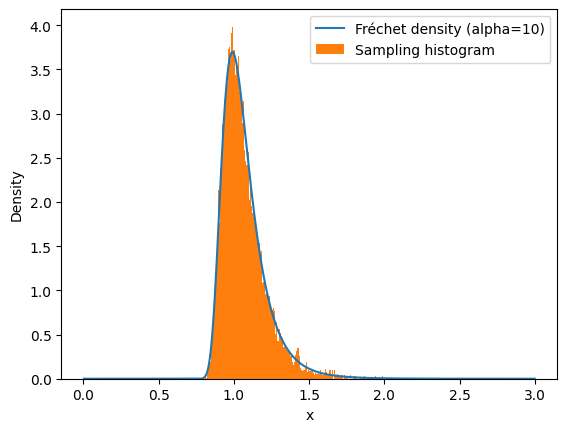

In [ ]:
# Comparison of the limit distribution with the Fréchet distribution

M = 10000
n = 200
a, b = n ** (1 / 10), 1

blocs = inverse_cdf(np.random.rand(M,n))

maxs = np.max(blocs, axis = 1)
maxs_N = (maxs - b) / a

x = np.linspace(0, 3, 1000)
dens = density_frechet(x)

plt.plot(x, dens, label='Fréchet density (alpha=10)')
plt.hist(maxs_N, bins = 200, density = True, label='Sampling histogram')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

#### Visualization of the uniform convergence to the Fréchet c.d.f. with $\alpha = 10$

<ipython-input-10-68d036d9cd45>:5: RuntimeWarning: divide by zero encountered in power
  return np.exp(-(x ** (-alpha)))


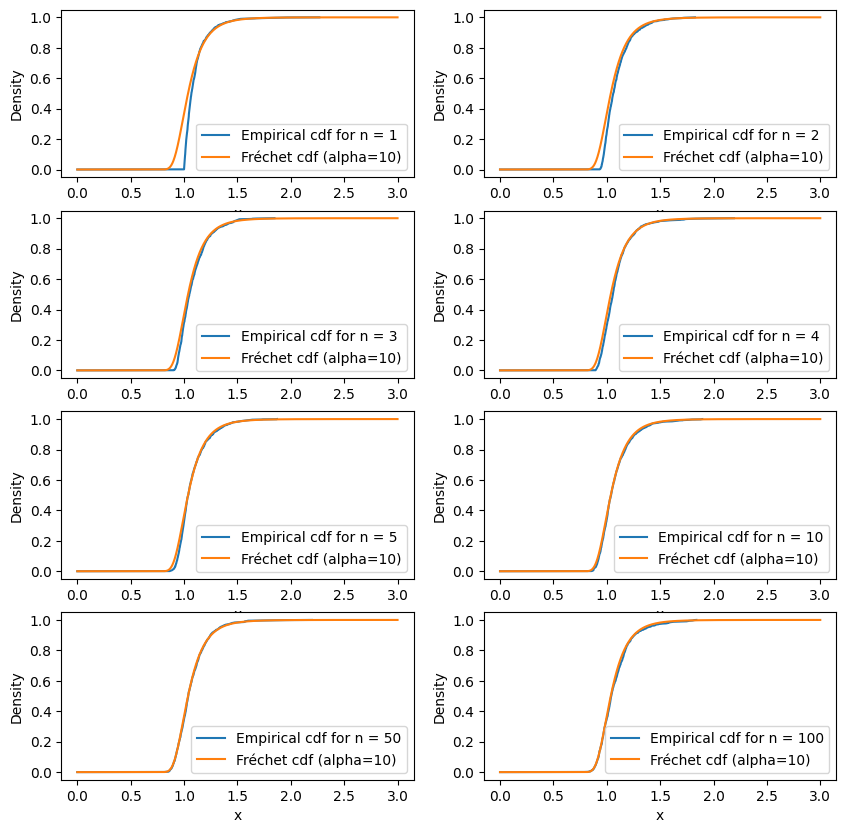

In [ ]:
# Changing n to see the uniform convergence to the Fréchet cdf with alpha = 10

fig, axs = plt.subplots(4,2, figsize = (10,10))

L_n = [1, 2, 3, 4, 5, 10, 50, 100]
M = 1000

x = np.linspace(0,3,1000)
cdf = cdf_frechet(x)

for i in range(8):
  n = L_n[i]

  blocs = inverse_cdf(np.random.rand(M,n))
  maxs = np.max(blocs, axis = 1)

  a, b = n ** (1 / 10), 1
  maxs_N = (maxs - b) / a

  maxs_N_sorted = np.sort(maxs_N)
  maxs_N_sorted = np.insert(maxs_N_sorted, 0, 0) #we add a value of 0 to our emperical cdf at abscisse -10 to graphically show that our emperical distribution is equal to 0 for x < maxs_N_sorted[0]
  idxs = np.arange(0, M + 1) / M

  axs[i // 2, i % 2].plot(maxs_N_sorted, idxs, label = f'Empirical cdf for n = {n}')
  axs[i // 2, i % 2].plot(x, cdf, label = 'Fréchet cdf (alpha=10)')
  axs[i // 2, i % 2].legend()
  axs[i // 2, i % 2].set_xlabel('x')
  axs[i // 2, i % 2].set_ylabel('Density')
plt.show()

Graphically, it seems we have a faster convergence to the Fréchet cdf.

We can see in the above figure that we seem to have uniform convergence of the cdf of our maximum taken among $n$ translated Pareto independant variables to the Fréchet cdf as $n$ goes to $+∞$.

We now compute the $L^∞$ norm of the difference to visualize the uniform convergence to the Fréchet cdf with $\alpha = 10$ as $n$ increases.

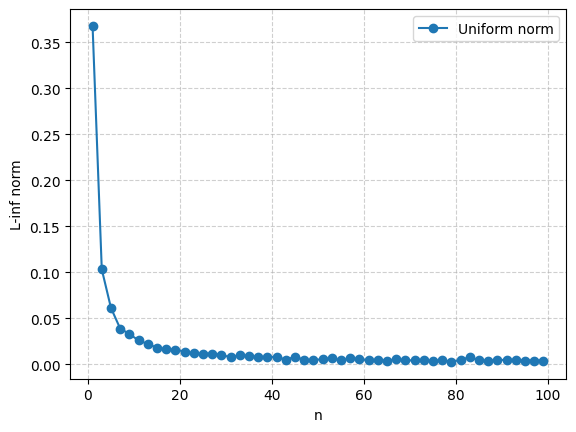

In [ ]:
L_n = np.arange(1, 100, 2)
sups = []
M = 100000

for n in L_n:

  blocs = inverse_cdf(np.random.rand(M,n))
  maxs = np.max(blocs, axis = 1)
  del blocs

  a, b = n ** (1 / 10), 1
  maxs_N = (maxs - b) / a

  maxs_N_sorted = np.sort(maxs_N)
  idxs = np.arange(1, M + 1) / M

  cdf = cdf_frechet(maxs_N_sorted)
  sups.append(np.max(np.abs(idxs - cdf)))

plt.grid(True, linestyle = '--', alpha = 0.6)
plt.xlabel('n')
plt.ylabel('L-inf norm')
plt.plot(L_n, sups, marker = 'o', label = 'Uniform norm')
plt.legend()

Numerically, we observe that the rate of convergence is similar to the rate of convergence of the maximum of the uniform distribution.

### 4. GEV parameters estimation with a maximum-likelihood method

In [ ]:
from scipy.stats import genextreme
from scipy.optimize import minimize
import seaborn as sns # To make beautiful histograms :)

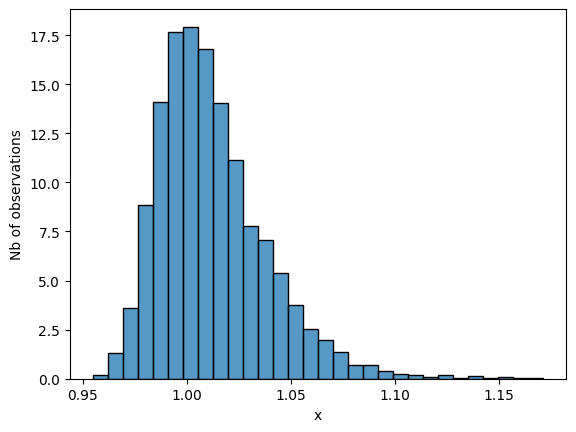

In [ ]:
n = 1000
M = 5000
alpha = 50
a, b = n ** (1 / alpha), 1

data = inverse_cdf(np.random.rand(M,n), alpha = alpha)
dataset =  np.max(data, axis = 1)
dataset = (dataset - b) / a

sns.histplot(dataset, bins=30, stat="density")
plt.xlabel('x')
plt.ylabel('Nb of observations')
plt.show()

To estimate the parameters of the GEV distribution, we utilize the `stats.genextreme()` function from the `scipy` package

In [ ]:
shape, loc, scale = genextreme.fit(dataset, method='MLE')

In [ ]:
print('Fitted shape =', shape)
print('Fitted loc =', loc)
print('Fitted scale =', scale)

Fitted shape = -0.0090054771324485
Fitted loc = 1.0002890904545048
Fitted scale = 0.020292723699746842


No we can generate another histogram of the data and overlay the Generalized Extreme Value (GEV) distribution with the fitted parameters.

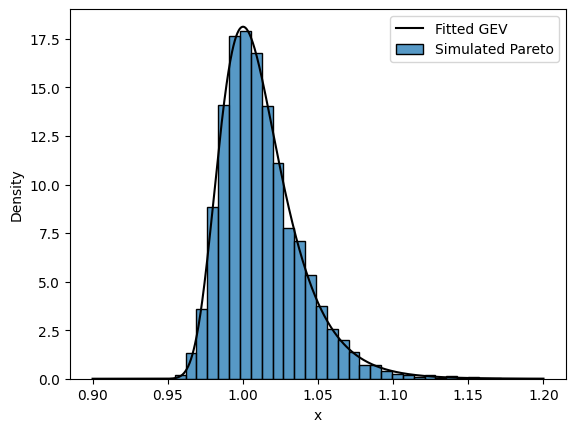

In [ ]:
fig, ax = plt.subplots()

sns.histplot(dataset, bins=30, stat="density", ax=ax, label='Simulated Pareto')

x_ = np.linspace(0.9, 1.2, 1000)
ax.plot(x_, genextreme.pdf(x_, shape, loc=loc, scale=scale), "k", label='Fitted GEV')
ax.set_xlabel('x')
ax.set_ylabel('Density')
plt.legend()
plt.show()

Finally, we can create a QQ-plot to assess how well our data aligns with the fitted GEV distribution.

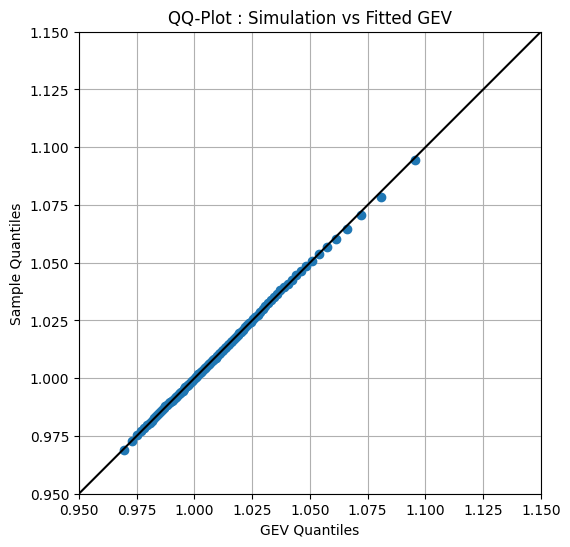

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(genextreme.ppf(np.linspace(0, 1, 100), shape, loc=loc, scale=scale), np.quantile(dataset, np.linspace(0, 1, 100)),"o")

ax.plot(np.linspace(0.9, 1.2, 100), np.linspace(0.9, 1.2, 100), "k")

ax.set_xlabel("GEV Quantiles")
ax.set_ylabel("Sample Quantiles")
ax.set_xlim(0.95, 1.15)
ax.set_ylim(0.95, 1.15)
ax.grid(True)
ax.set_aspect("equal")
plt.title('QQ-Plot : Simulation vs Fitted GEV')
plt.show()

Because the continuous fit function of `scikit` does not allow us to analyse the speed of convergence of the fit, we wrote another collab using R language `fgev` function and the same parameters $n, M, \alpha$:

https://colab.research.google.com/drive/1tE2hog8CZkmle9PgyninmUxhBe6kWVls

We see that the algorithm converges in 5 evaluation of a gradient which is very quick.

#### Miscellaneous / Draft

In [ ]:
def density_GEV(x, mu, sigma, gamma):
  t = (1 + gamma * ((x - mu)/ sigma)) ** (- 1 / gamma)
  return (1 / sigma) * t ** (gamma + 1) * np.exp(- t)

In [ ]:
np.min(dataset)

0.9546629178093482

In [ ]:
n = 365
M = 50
alpha = 10
a, b = n ** (1 / alpha), 1

data = inverse_cdf(np.random.rand(M,n), alpha = alpha)
dataset =  np.max(data, axis = 1)
dataset = (dataset - b) / a

def likelihood(x, dataset = dataset):
  mu, sigma, gamma = x
  likelihood = 1
  for data in dataset:
    #assert data >= mu - sigma / gamma
    if data >= mu - sigma / gamma:

     likelihood *= density_GEV(data, mu, sigma, gamma)
  return -np.log(likelihood)

In [ ]:
likelihood([1, 1, 1 / 10])

51.06803883894966

In [ ]:
eps = 1e-6
bounds = [(1,2), (eps, 1), (eps, 1)]
initial_guess = [1, 1, 1/10]

result = minimize(likelihood, initial_guess, method='L-BFGS-B', bounds=bounds)

minimum_value = result.fun
optimized_variables = result.x

print("Minimum Value:", minimum_value)
print("Optimized Variables:", optimized_variables)

Minimum Value: nan
Optimized Variables: [1.  1.  0.1]


<ipython-input-20-af7ce476c372>:2: RuntimeWarning: overflow encountered in double_scalars
  t = (1 + gamma * ((x - mu)/ sigma)) ** (- 1 / gamma)
<ipython-input-20-af7ce476c372>:3: RuntimeWarning: invalid value encountered in double_scalars
  return (1 / sigma) * t ** (gamma + 1) * np.exp(- t)


In [ ]:
minimum_value = result.fun
optimized_variables = result.x

print("Minimum Value:", minimum_value)
print("Optimized Variables:", optimized_variables)

Minimum Value: nan
Optimized Variables: [1.  1.  0.1]


In [ ]:
# here we construct a dataset where we are interested in the maximum per year during 50 years


n = 365
M = 50

data = inverse_cdf(np.random.rand(M,n))
dataset =  np.max(data, axis = 1)

params = genextreme.fit(dataset)
params

(0.04937823540401308, 2.813523371293043, 0.15505984274919501)

In [ ]:
# here we construct a dataset where we are interested in the maximum per year during 50 years

n = 1000
M = 5000
alpha = 5
a, b = n ** (1 / alpha), 1

data = inverse_cdf(np.random.rand(M,n), alpha = alpha)
dataset =  np.max(data, axis = 1)
dataset = (dataset - b) / a
print(genextreme.fit(dataset, loc = 1, scale = 1/alpha))


(-0.20038756108613143, 0.9995229686797092, 0.1998989953683939)
